<a href="https://colab.research.google.com/github/yaolihua081/Stanford-CS06dataviz/blob/main/CS06HW8_GeoPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*CS06* 

For this homwork, I did Altair GEO and Flium GEO for USA covid-19 deaths

In [7]:
#
import seaborn as sns

import sys, platform, numpy as np, nltk, re, sklearn, pandas as pd, seaborn as sns, collections


import matplotlib.pyplot as plt
import hashlib
import matplotlib.style as style
style.use('fivethirtyeight')

import altair as alt



In [91]:
#!pip install kaggle
from google.colab import files
files.upload()

Saving USAStateABV.csv to USAStateABV.csv


{'USAStateABV.csv': b'\xef\xbb\xbf"State","Abbrev","Code"\n"Alabama","Ala.","AL"\n"Alaska","Alaska","AK"\n"Arizona","Ariz.","AZ"\n"Arkansas","Ark.","AR"\n"California","Calif.","CA"\n"Colorado","Colo.","CO"\n"Connecticut","Conn.","CT"\n"Delaware","Del.","DE"\n"District of Columbia","D.C.","DC"\n"Florida","Fla.","FL"\n"Georgia","Ga.","GA"\n"Hawaii","Hawaii","HI"\n"Idaho","Idaho","ID"\n"Illinois","Ill.","IL"\n"Indiana","Ind.","IN"\n"Iowa","Iowa","IA"\n"Kansas","Kans.","KS"\n"Kentucky","Ky.","KY"\n"Louisiana","La.","LA"\n"Maine","Maine","ME"\n"Maryland","Md.","MD"\n"Massachusetts","Mass.","MA"\n"Michigan","Mich.","MI"\n"Minnesota","Minn.","MN"\n"Mississippi","Miss.","MS"\n"Missouri","Mo.","MO"\n"Montana","Mont.","MT"\n"Nebraska","Nebr.","NE"\n"Nevada","Nev.","NV"\n"New Hampshire","N.H.","NH"\n"New Jersey","N.J.","NJ"\n"New Mexico","N.M.","NM"\n"New York","N.Y.","NY"\n"North Carolina","N.C.","NC"\n"North Dakota","N.D.","ND"\n"Ohio","Ohio","OH"\n"Oklahoma","Okla.","OK"\n"Oregon","Ore.","OR"\

Altair 

In [12]:
#This data has state ID and state name
from vega_datasets import data
source = data.population_engineers_hurricanes()
source
states = alt.topo_feature(data.us_10m.url, 'states')
states

countries = alt.topo_feature(data.world_110m.url, 'countries')
countries

UrlData({
  format: TopoDataFormat({
    feature: 'countries',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/world-110m.json'
})

In [92]:

USAStateABV_data=pd.read_csv('USAStateABV.csv')#need this to have the state name match for Folium

In [9]:
Sex_age_state_data=pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_StateNov17.csv')##https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku
Sex_age_state_data.dropna()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote


In [10]:
Sex_age_state_data.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,11/12/2020,02/01/2020,11/07/2020,United States,All Sexes,All Ages,223984.0,2452180.0,228934.0,101910.0,6789.0,356777.0,NaN
1,11/12/2020,02/01/2020,11/07/2020,United States,All Sexes,Under 1 year,26.0,13879.0,131.0,4.0,16.0,169.0,NaN
2,11/12/2020,02/01/2020,11/07/2020,United States,All Sexes,0-17 years,115.0,24593.0,384.0,18.0,124.0,605.0,NaN
3,11/12/2020,02/01/2020,11/07/2020,United States,All Sexes,1-4 years,16.0,2598.0,88.0,2.0,42.0,144.0,NaN
4,11/12/2020,02/01/2020,11/07/2020,United States,All Sexes,5-14 years,39.0,4139.0,114.0,7.0,53.0,199.0,NaN


In [13]:
Sex_age_state_subset=Sex_age_state_data[['State', 'Sex','Age group','COVID-19 Deaths','Total Deaths','Influenza Deaths','Pneumonia Deaths']]
filter=Sex_age_state_data['Sex']=='All Sexes'
Sex_age_state_data_sub=Sex_age_state_data[filter]
filter=Sex_age_state_data_sub['Age group']=='All Ages'
Sex_age_state_data_sub_sub=Sex_age_state_data_sub[filter]
Sex_age_state_subset_sorted=Sex_age_state_data_sub_sub.sort_values(by='State')
source_sorted=source.sort_values(by='state')
source_sorted
Sex_age_state_subset_sorted['state']=Sex_age_state_subset_sorted['State']
Sex_age_state_subset_sorted.drop(['State'],axis = 1, inplace=True)

Sex_age_state_subset_sorted
all_state_data=pd.merge(Sex_age_state_subset_sorted,source_sorted)
all_state_data.head()


,Data as of,Start week,End Week,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote,state,id,population,engineers,hurricanes
0,11/12/2020,02/01/2020,11/07/2020,All Sexes,All Ages,4014.0,45852.0,3572.0,1306.0,102.0,6377.0,NaN,Alabama,1,4863300,0.003422,22
1,11/12/2020,02/01/2020,11/07/2020,All Sexes,All Ages,74.0,3400.0,157.0,37.0,NaN,200.0,One or more data cells have counts between 1-9...,Alaska,2,741894,0.001591,0
2,11/12/2020,02/01/2020,11/07/2020,All Sexes,All Ages,5378.0,56906.0,5794.0,3032.0,115.0,8255.0,NaN,Arizona,4,6931071,0.004774,0
3,11/12/2020,02/01/2020,11/07/2020,All Sexes,All Ages,1923.0,27354.0,2419.0,886.0,80.0,3534.0,NaN,Arkansas,5,2988248,0.002440,0
4,11/12/2020,02/01/2020,11/07/2020,All Sexes,All Ages,17374.0,230625.0,23180.0,9734.0,582.0,31400.0,NaN,California,6,39250017,0.007126,0


In [ ]:
bar1=alt.Chart(states, title="USA State Death Distributions by Nov 17, 2020").mark_geoshape().encode(
            alt.Color('COVID-19 Deaths', type='quantitative'),
            tooltip=['state:N',
                 alt.Tooltip('COVID-19 Deaths:Q'),
                 alt.Tooltip('Pneumonia Deaths:Q'),
                 alt.Tooltip('Influenza Deaths:Q'),
                 alt.Tooltip('Total Deaths:Q')]
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(all_state_data, 'id', ['state', 'Age group','COVID-19 Deaths','Total Deaths','Pneumonia Deaths','Influenza Deaths'])
    ).properties(
        width=500,
        height=300
    ).project(
        type='albersUsa'
)
combined=bar1
combined.save('USA_Covid_Geo.html')
from google.colab import files
files.download('USA_Covid_Geo.html')
combined

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

alt.Chart(...)

In [ ]:

all_state_data['State']=all_state_data['state']
all_state_data_sorted=all_state_data.sort_values(by='State')
USAStateABV_data_sorted=USAStateABV_data.sort_values(by='State')
all_dat=pd.merge(USAStateABV_data_sorted,all_state_data_sorted)[['Code','Total Deaths','COVID-19 Deaths']]
all_dat['State']=all_dat['Code']
all_dat

Folium 

In [109]:

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
m = folium.Map(location=[48, -102], zoom_start=3)
#bins = list(all_state_data['population'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=all_dat,
    columns=['State', 'COVID-19 Deaths'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='COVID-19 Deaths By 11-17'
).add_to(m)

folium.LayerControl().add_to(m)
m
#m.save('USA_covid_folium.html')
#from google.colab import files
#files.download('USA_covid_folium.html')

Folium World map, world covid-data
The code below is not working yet
1.   List item
2.   List item



In [64]:
World_Covid=pd.read_csv('owid-covid-dataNov17.csv')#https://github.com/owid/covid-19-data/tree/master/public/data
World_Covid.dropna()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index


In [65]:
temp=World_Covid.groupby(['continent'])['new_deaths_smoothed_per_million'].sum()
#np.sort(temp)
filter=temp> 600
prime_continet_name=temp[filter].index
filter1 = World_Covid['continent'].apply(lambda x: x in prime_continet_name)
World_Covid=World_Covid[filter1] #delte those continet with small death

country_location_name=World_Covid['location'].unique()#212 country location
continent_name=World_Covid['continent'].unique() #7 continent reduced to 5 continent now
World_Covid['month']=pd.DatetimeIndex(World_Covid['date']).month
World_Covid['week']=pd.DatetimeIndex(World_Covid['date']).week

def indicator(x, a):
  if x > a:
    y='yes'
  else:
    y='no'
  return y  



World_Covid['aging_index']= World_Covid['aged_65_older'].apply(lambda x: indicator(x,14.76))
World_Covid['poverty_index']= World_Covid['extreme_poverty'].apply(lambda x: indicator(x,18.80))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()


In [66]:
World_Covid['log_total_cases']=np.log(World_Covid['total_cases'])
World_Covid['log_total_deaths']=np.log(World_Covid['total_deaths'])
World_Covid['log_population']=np.log(World_Covid['population'])
World_Covid['death_rate']=100*World_Covid['total_deaths']/World_Covid['population']
World_Covid['cases_rate']=100*World_Covid['total_cases']/World_Covid['population']
World_Covid['test_rate']=100*World_Covid['total_tests']/World_Covid['population']

<function matplotlib.pyplot.show>

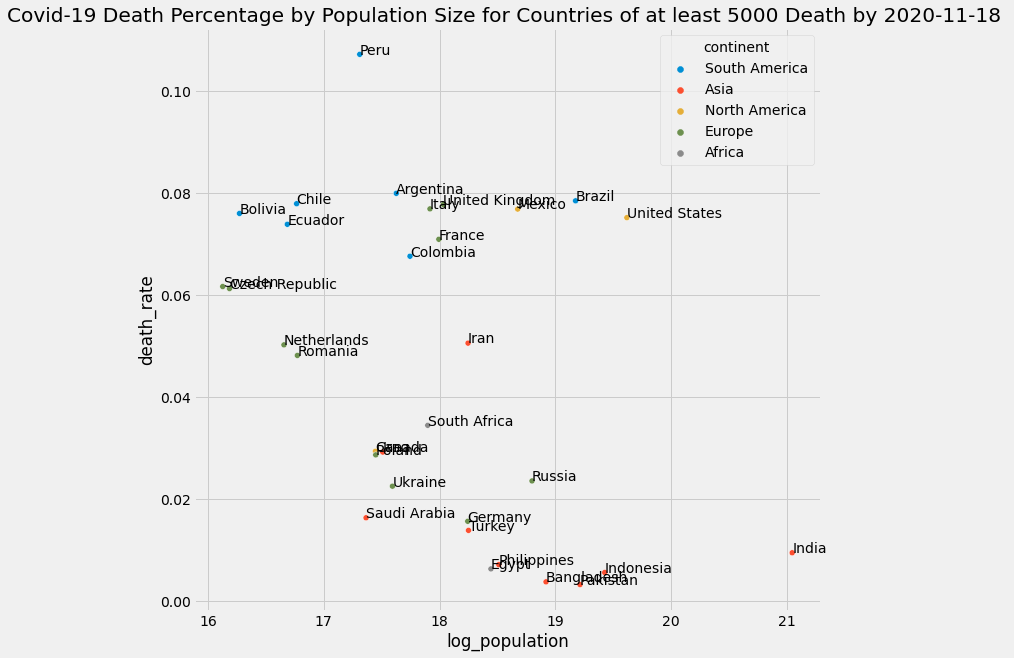

In [67]:
#World_Covid.head()
last_date=np.sort(World_Covid['date'])[-1]
last_date
filter=World_Covid['date']==last_date
Nov18_data=World_Covid[filter]
Nov18_data
filter=Nov18_data['total_deaths'] > 5000
Worst_country_Nov18_data=Nov18_data[filter] #28,48
Worst_country_Nov18_data

#plot 2020-10-08
locations=Worst_country_Nov18_data['location'].unique()
plt.figure(figsize=(10,10))
#sns.lineplot(x='month',y='total_cases_per_million', hue='continent',size='aged_65_older',data=World_Covid)
sns.scatterplot(x='log_population',y='death_rate', hue='continent',data=Worst_country_Nov18_data)
for i in range(len(locations)):
  #plt.annotate(locations[i], (Worst_country_Oct08_data['population'].tolist()[i], Worst_country_Oct08_data['death_rate'].tolist()[i]))
  plt.annotate(locations[i], (Worst_country_Nov18_data['log_population'].tolist()[i], Worst_country_Nov18_data['death_rate'].tolist()[i]))
 
plt.title("Covid-19 Death Percentage by Population Size for Countries of at least 5000 Death by 2020-11-18 ")
plt.show

In [108]:

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = f'{url}/us_county_data.csv'
county_geo = f'{url}/us_counties_20m_topo.json'

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
m = folium.Map(location=[48, -102], zoom_start=3)
#bins = list(all_state_data['population'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    #geo_data=county_geo,
    data=Worst_country_Nov18_data,
    columns=['location', 'total_cases'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='total cases'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [68]:
Worst_country_Nov18_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month,week,aging_index,poverty_index,log_total_cases,log_total_deaths,log_population,death_rate,cases_rate,test_rate
2142,ARG,South America,Argentina,2020-11-18,1329005.0,10634.0,9506.143,36106.0,379.0,274.714,29405.513,235.287,210.333,798.880,8.386,6.078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.519578e+07,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.000,76.67,0.825,11,47,no,no,14.099941,10.494214,17.626514,0.079888,2.940551,NaN
5226,BGD,Asia,Bangladesh,2020-11-18,436684.0,2212.0,1866.286,6254.0,39.0,20.857,2651.561,13.431,11.332,37.975,0.237,0.127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.646894e+08,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.800,72.59,0.608,11,47,no,no,12.986965,8.740977,18.919572,0.003797,0.265156,NaN
7363,BOL,South America,Bolivia,2020-11-18,143473.0,227.0,115.571,8866.0,17.0,8.286,12290.983,19.447,9.901,759.529,1.456,0.710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.167303e+07,10.202,25.4,6.704,4.393,6885.829,7.1,204.299,6.89,NaN,NaN,25.383,1.100,71.51,0.693,11,47,no,no,11.873902,9.089979,16.272792,0.075953,1.229098,NaN
7687,BRA,South America,Brazil,2020-11-18,5911758.0,35294.0,30244.857,166699.0,685.0,552.857,27812.262,166.043,142.289,784.247,3.223,2.601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.200,75.88,0.759,11,47,no,no,15.592454,12.023945,19.174732,0.078425,2.781226,NaN
9243,CAN,North America,Canada,2020-11-18,306468.0,4276.0,4775.857,11086.0,59.0,64.857,8120.045,113.295,126.539,293.730,1.563,1.718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.774216e+07,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.500,82.43,0.926,11,47,yes,no,12.632869,9.313438,17.446288,0.029373,0.812004,NaN
9826,CHL,South America,Chile,2020-11-18,533610.0,1006.0,1386.143,14883.0,20.0,38.857,27914.007,52.625,72.511,778.554,1.046,2.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.911621e+07,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.110,80.18,0.843,11,47,no,no,13.187421,9.607975,16.766047,0.077855,2.791401,NaN
11409,COL,South America,Colombia,2020-11-18,1211128.0,5911.0,7779.000,34381.0,158.0,176.143,23802.267,116.169,152.880,675.689,3.105,3.462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.088288e+07,44.223,32.2,7.646,4.312,13254.949,4.5,124.240,7.44,4.7,13.5,65.386,1.710,77.29,0.747,11,47,no,no,14.007063,10.445259,17.745037,0.067569,2.380227,NaN
13424,CZE,Europe,Czech Republic,2020-11-18,469769.0,4246.0,5698.429,6558.0,142.0,176.429,43866.821,396.490,532.117,612.383,13.260,16.475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.070898e+07,137.176,43.3,19.027,11.580,32605.906,NaN,227.485,6.82,30.5,38.3,NaN,6.630,79.38,0.888,11,47,yes,no,13.059996,8.788441,16.186593,0.061238,4.386682,NaN
1

In [76]:
countries_name=Worst_country_Nov18_data_sub_sorted['name']
meteorite_sorted_sub=meteorite_sorted['name'].apply(lambda x: x in countries_name)


UrlData({
  format: TopoDataFormat({
    feature: 'countries',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/world-110m.json'
})

Folium

In [56]:
#Import the folium for maping
import folium
#meteorite=pd.read_csv("meteorite-landings.csv")


In [49]:

Worst_country_Nov18_data_sub['name']=Worst_country_Nov18_data_sub['location']
meteorite_sorted=meteorite.sort_values(by='name')
Worst_country_Nov18_data_sub_sorted=Worst_country_Nov18_data_sub.sort_values(by='name')
all=pd.merge(meteorite_sorted, Worst_country_Nov18_data_sub_sorted)
all.head()

NameError: ignored

In [55]:

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
m = folium.Map(location=[48, -102], zoom_start=3)
bins = list(all_state_data['Total Deaths'].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    data=all_state_data,
    columns=['state', 'Total Deaths'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Deaths',
    bins=bins,
    reset=True
).add_to(m)

folium.LayerControl().add_to(m)

m

In [53]:
import pandas as pd


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [88]:
state_data

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8
